In [1]:
import psycopg2 as pg2 
import os, sys
import pandas as pd
import glob

/tmp/ipykernel_22096/3147899435.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [18]:
path = "/home/suhani/Documents/TBTFW-THA-027/data/*.csv"
i=0
for fname in glob.glob(path):
    df1 = pd.read_csv(fname)
    df = df1.dropna()
    # df = df.astype({'Date':'string'})
    df['Date'] = pd.to_datetime(df['Date'])
    print(df['Date'].dtype)
    print(df.columns)
    

datetime64[ns]
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
datetime64[ns]
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
datetime64[ns]
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
datetime64[ns]
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
datetime64[ns]
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
datetime64[ns]
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
datetime64[ns]
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


/tmp/ipykernel_22096/1187226492.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
/tmp/ipykernel_22096/1187226492.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [60]:
import psycopg2 as pg2 
import os, sys
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from tabulate import tabulate

conn = pg2.connect(database="db_name", user='user_name', password='password', host="localhost", port=5432)

cursor = conn.cursor()

cursor.execute("select version()")

companies = ['tsla', 'inr_x', 'tatamotors', 'aapl', 'hdb', 'jiofin', 'mara']
for comp in companies:
    sql = f"create table {comp} (Date Date, Open varchar(50), High varchar(50), Low varchar(50), Close varchar(50), Adj_close varchar(50), Volume varchar(50));"
    cursor.execute(sql)
# sql2= f"\COPY AAPL(Date, Open, high, Low, Close, Adj_close, Volume) from '/home/suhani/Documents/TBTFW-THA-027/data/AAPL.csv' DELIMITER ',' CSV HEADER;"

path = "/home/suhani/Documents/TBTFW-THA-027/data/*.csv"
filepath = []
for fname in glob.glob(path):
    # print(fname)
    filepath.append(fname)
    df1 = pd.read_csv(fname)
    df = df1.dropna()
    # make new clean csv files or it makes no sense
i=0
for comp, pathn in zip(companies, filepath):
    # print(comp, pathn)
    with open(pathn, 'r') as f:
        # print(f'_____________________{i}')
        next(f)
        cursor.execute(f'delete from {comp};')
        cursor.copy_from(f, comp, sep=',', columns=('date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'))
        cursor.execute(f'select * from {comp};')
        data = cursor.fetchall()
        # print(comp, data[0])
        i+=1
    

stocks_data={}
for comp in companies:
    cursor.execute(f'select * from {comp};')
    data = cursor.fetchall()
    stocks_data[comp] = data

stocks_df={}
for stock, values in stocks_data.items():
    df1 = pd.DataFrame(values, columns=['date','open','high','low','close', 'adj_close', 'volume'])
    df = df1.dropna()
    stocks_df[stock] = df

    cols_to_convert = ['open', 'high', 'low', 'close', 'adj_close', 'volume']
    stocks_df[stock][cols_to_convert] = stocks_df[stock][cols_to_convert].apply(pd.to_numeric, errors='coerce')





/tmp/ipykernel_23676/3462454427.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['position'] = df_pos['position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')


+-----+------------+--------+--------+--------+---------+-------------+-----------+---------------------+----------------------+----------+------------+
|     | date       |   open |   high |    low |   close |   adj_close |    volume |   20_day_moving_avg |   200_day_moving_avg |   signal | position   |
|-----+------------+--------+--------+--------+---------+-------------+-----------+---------------------+----------------------+----------+------------|
|  39 | 2023-04-18 | 187.15 | 187.69 | 183.58 |  184.31 |      184.31 |  92067000 |             190.05  |              189.964 |        1 | Buy        |
|  40 | 2023-04-19 | 179.1  | 183.5  | 177.65 |  180.59 |      180.59 | 125732700 |             189.2   |              189.735 |        0 | Sell       |
|  72 | 2023-06-05 | 217.8  | 221.29 | 214.52 |  217.61 |      217.61 | 151143100 |             184.633 |              183.772 |        1 | Buy        |
| 181 | 2023-11-08 | 223.15 | 224.15 | 217.64 |  222.11 |      222.11 | 106584800 

/tmp/ipykernel_23676/3462454427.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['position'] = df_pos['position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')


+------+------------+---------+---------+---------+---------+-------------+----------+---------------------+----------------------+----------+------------+
|      | date       |    open |    high |     low |   close |   adj_close |   volume |   20_day_moving_avg |   200_day_moving_avg |   signal | position   |
|------+------------+---------+---------+---------+---------+-------------+----------+---------------------+----------------------+----------+------------|
|   63 | 2019-05-17 | 70.2271 | 70.303  | 70.075  | 70.235  |     70.235  |        0 |             69.8946 |              69.8668 |        1 | Buy        |
|   80 | 2019-06-11 | 69.509  | 69.74   | 69.348  | 69.5235 |     69.5235 |        0 |             69.788  |              69.8337 |        0 | Sell       |
|  125 | 2019-08-13 | 71.276  | 71.58   | 70.74   | 71.58   |     71.58   |        0 |             69.7067 |              69.6967 |        1 | Buy        |
|  408 | 2020-09-11 | 73.75   | 73.75   | 73.364  | 73.5273 |   

/tmp/ipykernel_23676/3462454427.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['position'] = df_pos['position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')


+----+------------+--------+--------+-------+---------+-------------+----------+---------------------+----------------------+----------+------------+
|    | date       |   open |   high |   low |   close |   adj_close |   volume |   20_day_moving_avg |   200_day_moving_avg |   signal | position   |
|----+------------+--------+--------+-------+---------+-------------+----------+---------------------+----------------------+----------+------------|
| 36 | 2023-04-18 |    475 | 483.35 | 468.1 |     473 |      471.53 | 16140056 |               432.1 |              430.347 |        1 | Buy        |
+----+------------+--------+--------+-------+---------+-------------+----------+---------------------+----------------------+----------+------------+
Empty DataFrame
Columns: [date, open, high, low, close, adj_close, volume, 20_day_moving_avg, 200_day_moving_avg, signal, position]
Index: []
+----+------------+--------+--------+--------+---------+-------------+----------+---------------------+-----

/tmp/ipykernel_23676/3462454427.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['position'] = df_pos['position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')


+----+------------+--------+--------+--------+---------+-------------+-------------+---------------------+----------------------+----------+------------+
|    | date       |   open |   high |    low |   close |   adj_close |      volume |   20_day_moving_avg |   200_day_moving_avg |   signal | position   |
|----+------------+--------+--------+--------+---------+-------------+-------------+---------------------+----------------------+----------+------------|
| 22 | 2023-09-21 |    230 |  235.6 | 226.8  |  227.65 |      227.65 | 3.31016e+07 |             237.132 |              237.072 |        1 | Buy        |
| 33 | 2023-10-09 |    223 |  223   | 218.85 |  219.65 |      219.65 | 9.69691e+06 |             232.9   |              233.835 |        0 | Sell       |
| 74 | 2023-12-08 |    249 |  250.5 | 240    |  244.25 |      244.25 | 1.90568e+07 |             227.972 |              227.88  |        1 | Buy        |
+----+------------+--------+--------+--------+---------+-------------+------

/tmp/ipykernel_23676/3462454427.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['position'] = df_pos['position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')


+------+------------+--------+--------+--------+---------+-------------+----------+---------------------+----------------------+----------+------------+
|      | date       |   open |   high |    low |   close |   adj_close |   volume |   20_day_moving_avg |   200_day_moving_avg |   signal | position   |
|------+------------+--------+--------+--------+---------+-------------+----------+---------------------+----------------------+----------+------------|
|   61 | 2012-08-01 | 105.04 | 105.04 | 105.04 |  105.04 |      105.04 |        0 |            100.464  |            100.075   |        1 | Buy        |
|   94 | 2012-09-18 | 104    | 104    | 104    |  104    |      104    |        0 |            100.828  |            100.913   |        0 | Sell       |
|  108 | 2012-10-08 | 104    | 104    | 104    |  104    |      104    |        0 |            104      |            101.309   |        1 | Buy        |
|  130 | 2012-11-09 | 104    | 104    |  53.04 |   53.04 |       53.04 |        6 

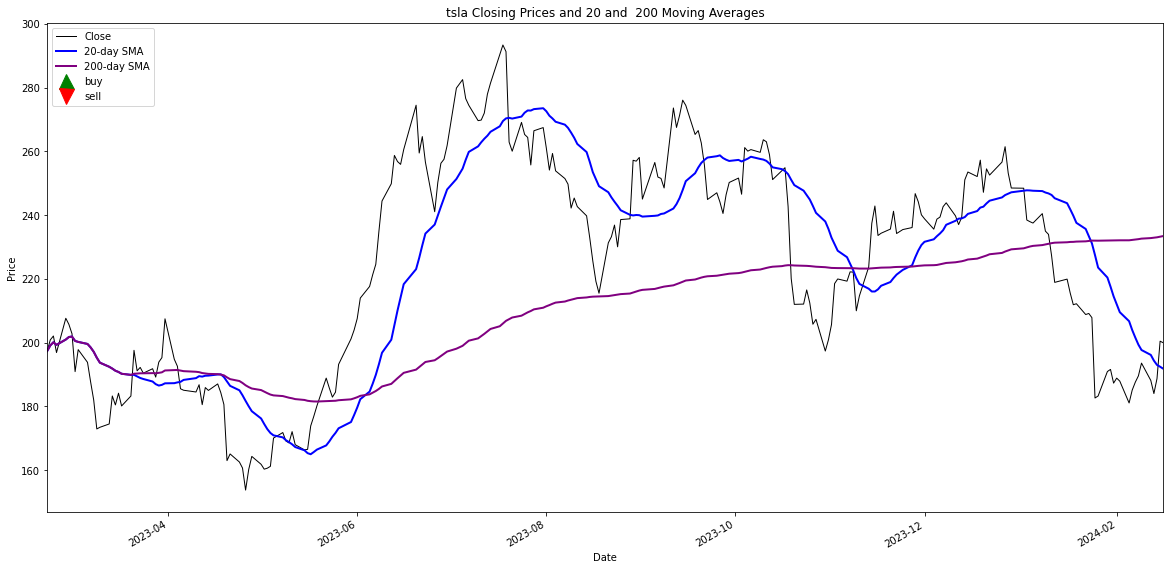

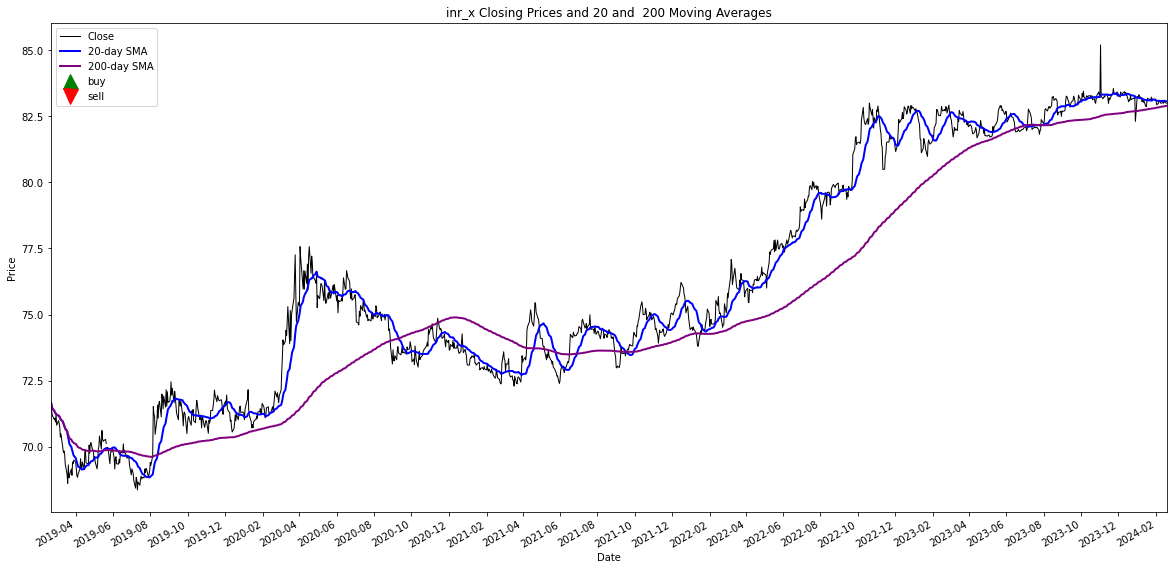

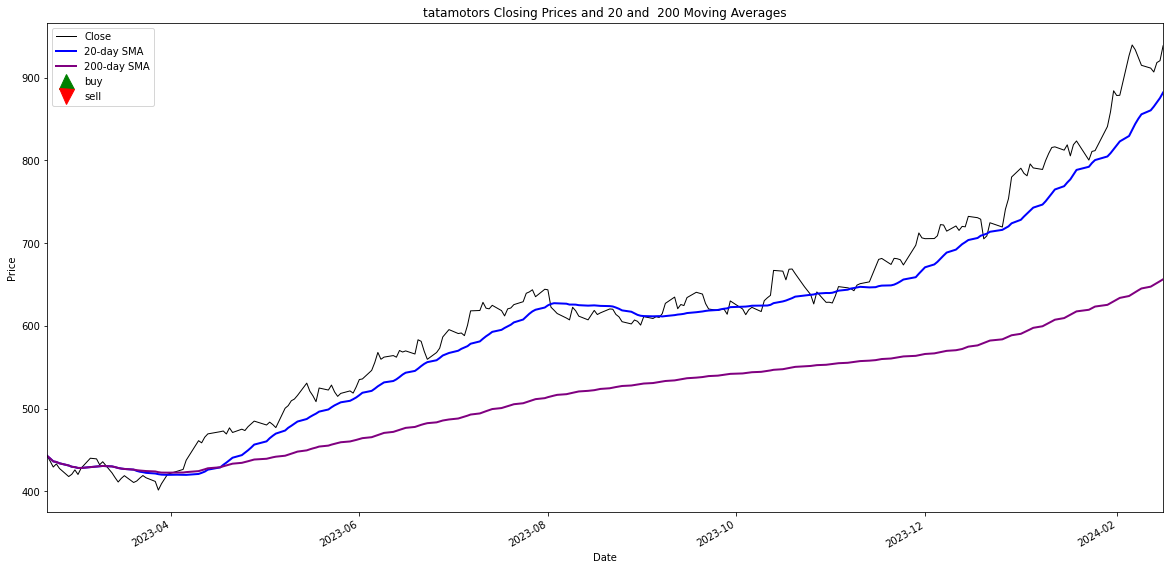

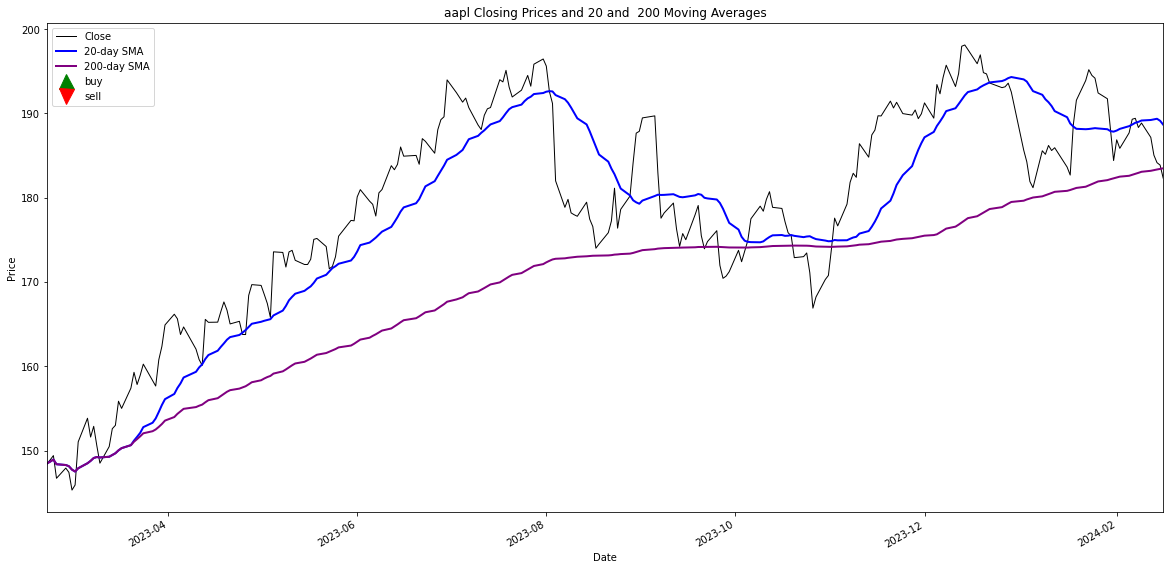

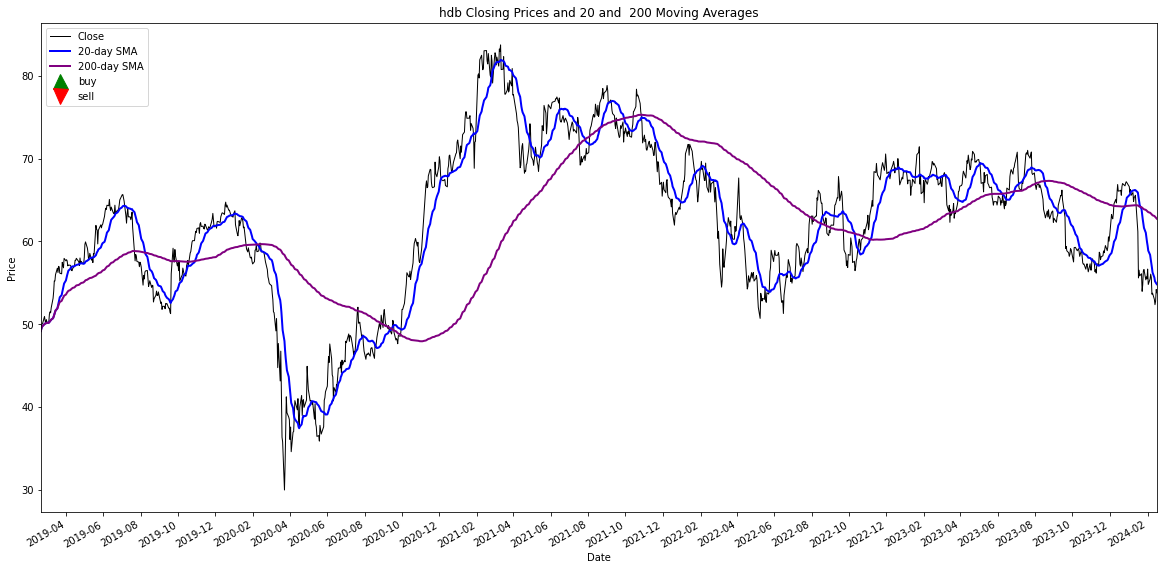

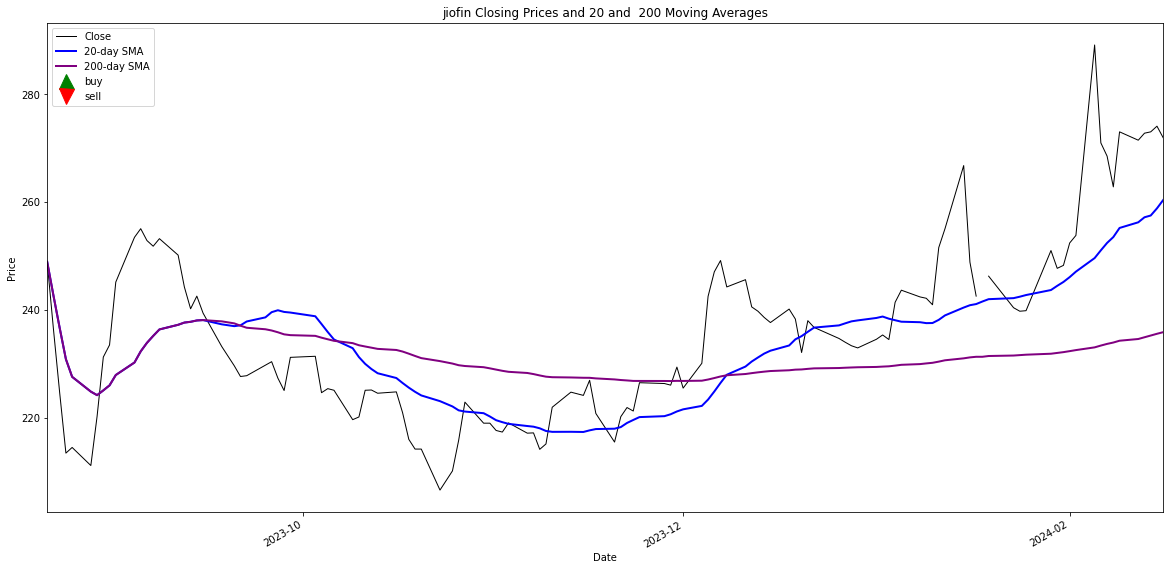

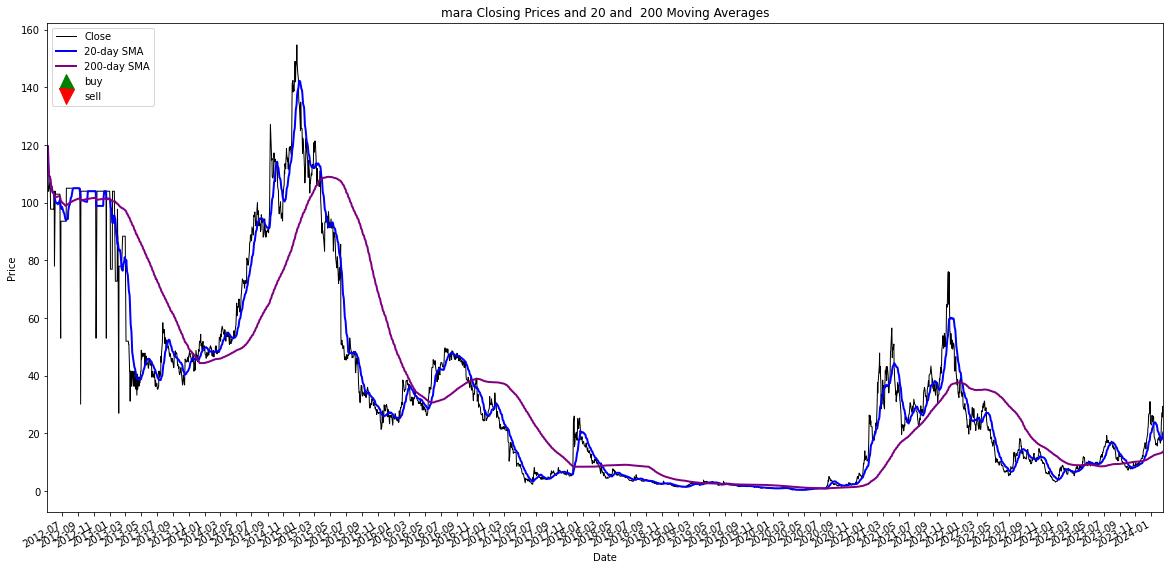

In [75]:
def crossoverstrategey(strategy, stock, stocks_df, short_window=20, long_window=200):
    # close_price = stocks_df[stock]['close']
    start_date = stocks_df[stock]['date'].iloc[0]
    end_date = stocks_df[stock]['date'].iloc[-1]

    short_wd = str(short_window) + '_day_moving_avg'
    long_wd = str(long_window) + '_day_moving_avg'

    if strategy == 'SMA':
        stocks_df[stock][short_wd] = stocks_df[stock]['close'].rolling(window=short_window, min_periods=1).mean()
        stocks_df[stock][long_wd] = stocks_df[stock]['close'].rolling(window=long_window, min_periods=1).mean() 

    # generate the signal
    stocks_df[stock]['signal'] = 0
    stocks_df[stock]['signal'] = np.where(stocks_df[stock][short_wd] > stocks_df[stock][long_wd], 1, 0)

    stocks_df[stock]['position'] = stocks_df[stock]['signal'].diff()

    plt.figure(figsize=(20,10))
    plt.plot(stocks_df[stock]['date'], stocks_df[stock]['close'], label='Close', color='black', lw=1)

    # Plot smoothed moving averages
    plt.plot(stocks_df[stock]['date'], stocks_df[stock]['20_day_moving_avg'], label='20-day SMA', color='blue', lw=2)
    plt.plot(stocks_df[stock]['date'], stocks_df[stock]['200_day_moving_avg'], label='200-day SMA', color='purple', lw=2)


    plt.plot(stocks_df[stock][stocks_df[stock]['position'] == 1].index, 
                stocks_df[stock][short_wd][stocks_df[stock]['position'] == 1], 
                '^', markersize = 15, color = 'g', alpha = 1, label = 'buy')

        # plot 'sell' signals
    plt.plot(stocks_df[stock][stocks_df[stock]['position'] == -1].index, 
            stocks_df[stock][short_wd][stocks_df[stock]['position'] == -1], 
            'v', markersize = 15, color = 'r', alpha = 1, label = 'sell')

    # Set plot title and labels
    plt.title(f'{comp} Closing Prices and {short_window} and  {long_window} Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    # plt.grid(True)

    # Format date axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.gcf().autofmt_xdate()

    # Adjust legend position
    plt.legend(loc='upper left')
    plt.xlim(start_date, end_date)
    # plt.show()
    # plt.savefig(f'{stock} {short_window} and  {long_window} Moving Averages Crossover.png')

    df_pos = stocks_df[stock][(stocks_df[stock]['position'] == 1) | (stocks_df[stock]['position'] == -1)]
    df_pos['position'] = df_pos['position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
    print(tabulate(df_pos, headers = 'keys', tablefmt = 'psql'))

strategy='SMA'
for comp in companies:
    crossoverstrategey(strategy, comp, stocks_df)
    print(stocks_df[comp][stocks_df[comp]['position']==-1])



In [76]:
# stocks_df['aapl']['position'] = stocks_df['aapl']['position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
stocks_df['aapl']['position']

0      NaN
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
249    0.0
Name: position, Length: 250, dtype: float64

In [58]:
def calculate_trade_profit_loss(df, stock):
    # Calculate the profit/loss for each trade based on the position (Buy/Sell)
    df[stock]['profit_loss'] = df[stock]['position'].diff() * df[stock]['close'].shift(-1)

# Define a function to calculate overall profit/loss for each stock
def calculate_overall_profit_loss(df, stock):
    # Calculate the overall profit/loss for each stock by summing up the profits and losses
    overall_profit_loss = df[stock]['profit_loss'].sum()
    return overall_profit_loss

for stock in companies:
    # Calculate profit/loss for each trade
    calculate_trade_profit_loss(stocks_df, stock)
    
    # Calculate overall profit/loss for the stock
    overall_profit_loss = calculate_overall_profit_loss(stocks_df, stock)
    
    # Store the results in the database
    cursor.execute(f"INSERT INTO {stock} (overall_profit_loss) VALUES ({overall_profit_loss})")

InFailedSqlTransaction: current transaction is aborted, commands ignored until end of transaction block
